<a href="https://colab.research.google.com/github/elmilanos/ProbabilityStatistics/blob/main/Pr%C3%A1ctica_M%C3%B3dulo_7_Distribuciones_de_Probabilidad_Continua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de Datos del Mundo Real con Distribuciones de Probabilidad
En este trabajo, exploraremos datos reales de Durango y analizaremos su ajuste a tres distribuciones estadísticas fundamentales:

1. **Distribución Normal:** Modela variables continuas con una tendencia central clara.

2. **Distribución Exponencial:** Modela el tiempo entre eventos aleatorios.

3. **Distribución Chi-Cuadrada:** Evalúa la relación entre variables categóricas.

Los datos utilizados provienen de fuentes como el INEGI, y el análisis se realizará en Python utilizando bibliotecas como *numpy*, *pandas*, *matplotlib*, *seaborn* y *scipy.stats*.

# Ejercicio 1: Distribución Normal
La distribución normal es una de las distribuciones más comunes en la estadística, utilizada para modelar variables continuas como **la temperatura, el ingreso per cápita o la estatura de la población.**
Esta distribución tiene forma de campana y se describe por dos parámetros:

- **Media (μ):** Representa el valor promedio.

- **Desviación estándar (σ):** Indica qué tan dispersos están los datos alrededor de la media.

## Aplicación en Durango:

- Si la temperatura sigue una normal, podemos predecir eventos climáticos con más certeza.

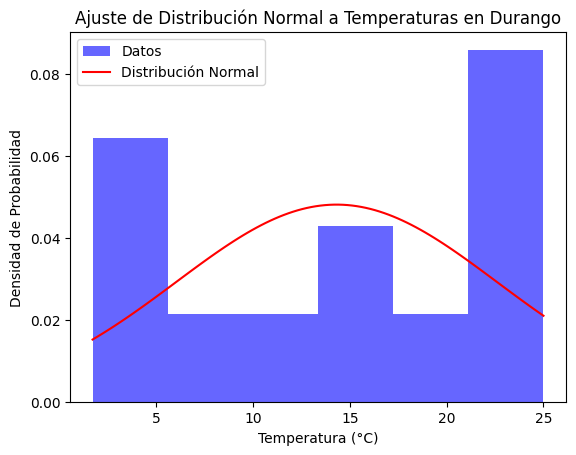

Estadístico KS: 0.1702, p-valor: 0.8220
Los datos pueden considerarse normalmente distribuidos.


In [6]:
# --- EJERCICIO 1: DISTRIBUCIÓN NORMAL ---
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Datos sintéticos de temperaturas promedio mensuales en Durango (en °C)
temperaturas_mensuales = np.array([1.7, 4.5, 10.0, 15.0, 22.0, 25.0, 24.0, 23.5, 20.0, 15.0, 8.0, 3.0])

# Calcular media y desviación estándar
media = np.mean(temperaturas_mensuales)
desviacion = np.std(temperaturas_mensuales)

# Crear una distribución normal basada en los parámetros calculados
x = np.linspace(min(temperaturas_mensuales), max(temperaturas_mensuales), 100)
pdf = stats.norm.pdf(x, media, desviacion)

# Graficar histograma y curva normal
plt.hist(temperaturas_mensuales, bins=6, density=True, alpha=0.6, color='b', label="Datos")
plt.plot(x, pdf, 'r-', label="Distribución Normal")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Densidad de Probabilidad")
plt.title("Ajuste de Distribución Normal a Temperaturas en Durango")
plt.legend()
plt.show()

# Prueba de Kolmogorov-Smirnov para evaluar el ajuste
ks_stat, p_value = stats.kstest(temperaturas_mensuales, 'norm', args=(media, desviacion))
print(f"Estadístico KS: {ks_stat:.4f}, p-valor: {p_value:.4f}")

if p_value > 0.05:
    print("Los datos pueden considerarse normalmente distribuidos.")
else:
    print("Los datos no siguen una distribución normal.")


# Ejercicio 2: Distribución Exponencial
La distribución exponencial modela eventos que ocurren de manera aleatoria en el tiempo, como:
- El tiempo entre lluvias significativas.
- El tiempo entre accidentes de tránsito en una intersección.
- El tiempo entre llegadas de clientes a un negocio.

La distribución exponencial depende de un solo parámetro:
- **λ (lambda):** La tasa de ocurrencia de eventos por unidad de tiempo.

## Aplicación en Durango:

- Puede ayudar a **predecir lluvias** y planificar medidas de prevención de inundaciones.

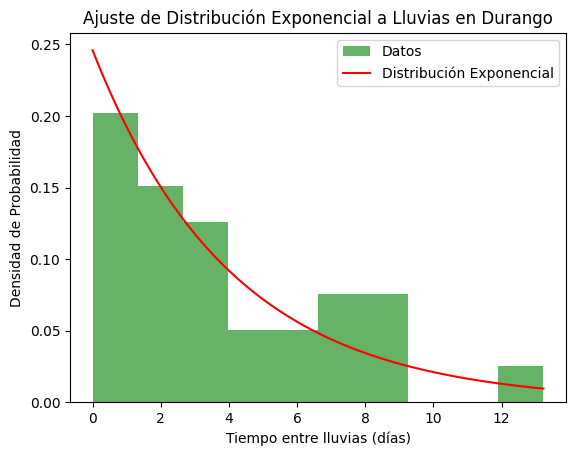

Valor estimado de λ: 0.2459016393442623
Media de los datos: 3.7956221963277783, Varianza: 10.354696033052601


In [3]:
# --- EJERCICIO 2: DISTRIBUCIÓN EXPONENCIAL ---

# Datos sintéticos de lluvias
num_lluvias = 30  # Número de lluvias significativas
duracion_temporada = 122  # Días de la temporada de lluvias
lambda_lluvias = num_lluvias / duracion_temporada  # Tasa de ocurrencia

# Generar datos sintéticos para tiempos entre lluvias
tiempos_entre_lluvias = np.random.exponential(scale=1/lambda_lluvias, size=num_lluvias)

# Graficar histograma y distribución exponencial
x = np.linspace(0, max(tiempos_entre_lluvias), 100)
pdf = stats.expon.pdf(x, scale=1/lambda_lluvias)

plt.hist(tiempos_entre_lluvias, bins=10, density=True, alpha=0.6, color='g', label="Datos")
plt.plot(x, pdf, 'r-', label="Distribución Exponencial")
plt.xlabel("Tiempo entre lluvias (días)")
plt.ylabel("Densidad de Probabilidad")
plt.title("Ajuste de Distribución Exponencial a Lluvias en Durango")
plt.legend()
plt.show()

# Media y varianza de los datos generados
media_empirica = np.mean(tiempos_entre_lluvias)
varianza_empirica = np.var(tiempos_entre_lluvias)

print(f"Valor estimado de λ: {lambda_lluvias:.4f}")
print(f"Media de los datos: {media_empirica:.4f}, Varianza: {varianza_empirica:.4f}")


# Ejercicio 3: Distribución Chi-Cuadrada
La distribución chi-cuadrada se utiliza para analizar la relación entre variables categóricas y determinar si existe **una asociación estadísticamente significativa** entre ellas.

Ejemplo de análisis en Durango:
- **Sector económico vs. Tamaño de empresa** → ¿Las grandes empresas se concentran en ciertos sectores?
- **Nivel educativo vs. Nivel de ingresos** → ¿Existe relación entre la educación y el salario promedio?

*Puede ayudar a analizar la relación entre sectores económicos y el tamaño de empresas, útil para políticas de desarrollo.*

## Objetivo
Evaluar si dos variables categóricas están relacionadas mediante una **prueba de independencia chi-cuadrada.**

Tabla de contingencia:
             Pequeña  Mediana  Grande
Agricultura       50       30      20
Manufactura       40       35      25
Servicios         60       45      15

Resultados de la prueba chi-cuadrada:
Estadístico chi-cuadrada: 7.0424
p-valor: 0.1337
No hay evidencia suficiente para afirmar que las variables están relacionadas.


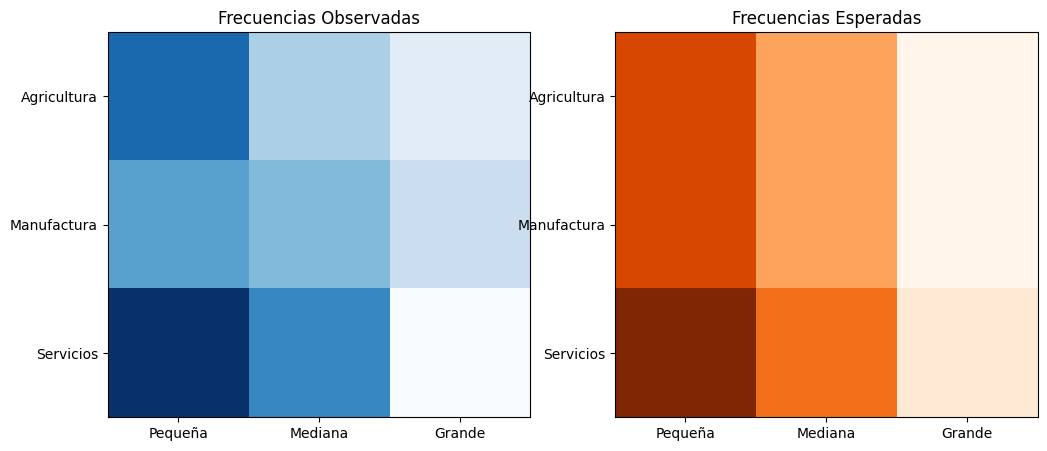

In [7]:
# --- EJERCICIO 3: DISTRIBUCIÓN CHI-CUADRADA ---
import pandas as pd
from scipy.stats import chi2_contingency

# Definir sectores económicos y tamaños de empresas
sectores = ['Agricultura', 'Manufactura', 'Servicios']
tamanos = ['Pequeña', 'Mediana', 'Grande']

# Crear una tabla de contingencia sintética
tabla_contingencia = pd.DataFrame(
    data=[[50, 30, 20], [40, 35, 25], [60, 45, 15]],
    index=sectores,
    columns=tamanos
)

# Aplicar la prueba de chi-cuadrada
chi2_stat, p_valor, dof, esperados = chi2_contingency(tabla_contingencia)

print("Tabla de contingencia:")
print(tabla_contingencia)
print("\nResultados de la prueba chi-cuadrada:")
print(f"Estadístico chi-cuadrada: {chi2_stat:.4f}")
print(f"p-valor: {p_valor:.4f}")

if p_valor > 0.05:
    print("No hay evidencia suficiente para afirmar que las variables están relacionadas.")
else:
    print("Existe una relación estadísticamente significativa entre el sector económico y el tamaño de la empresa.")

# Graficar frecuencias observadas y esperadas
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de frecuencias observadas
ax[0].imshow(tabla_contingencia, cmap='Blues', aspect='auto')
ax[0].set_xticks(np.arange(len(tamanos)))
ax[0].set_yticks(np.arange(len(sectores)))
ax[0].set_xticklabels(tamanos)
ax[0].set_yticklabels(sectores)
ax[0].set_title("Frecuencias Observadas")

# Gráfico de frecuencias esperadas
ax[1].imshow(esperados, cmap='Oranges', aspect='auto')
ax[1].set_xticks(np.arange(len(tamanos)))
ax[1].set_yticks(np.arange(len(sectores)))
ax[1].set_xticklabels(tamanos)
ax[1].set_yticklabels(sectores)
ax[1].set_title("Frecuencias Esperadas")

plt.show()


### Ejemplo de Aplicación:
Si encontramos que el **sector económico y el tamaño de la empresa están relacionados**, esto podría ayudar a **diseñar políticas económicas** para fomentar el crecimiento de ciertos sectores.